In [8]:
import numpy as np
from gwpy.timeseries import TimeSeries
from scipy.signal import get_window
from gwosc.datasets import event_gps
import math
from gwpy.frequencyseries import FrequencySeries


# Sensitivity curve

8192.0 Hz
0.2100830078125 s


/home/gui/miniconda3/envs/GW/lib/python3.12/site-packages/gwpy/plot/plot.py:287: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  super().show(warn=warn)


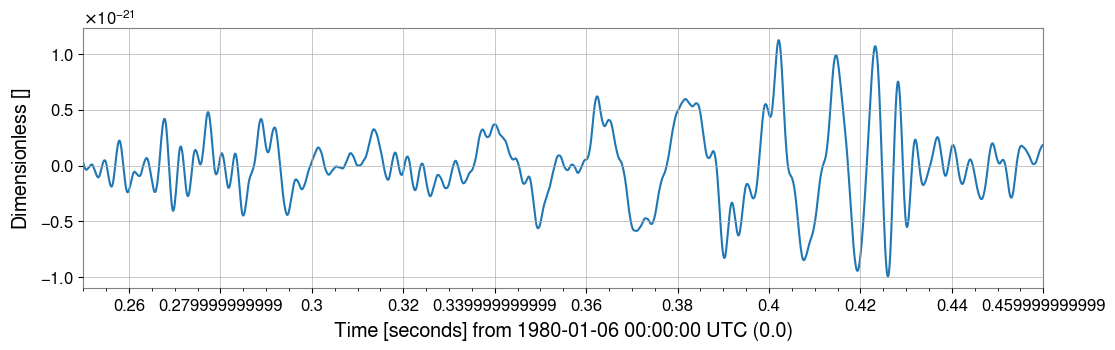

In [405]:
data = TimeSeries.read('../data/fig1-observed-H.txt')
data = data * 1.e-21
data = data.resample(8192)
print(data.sample_rate)
print(data.duration)
plot = data.plot()
ax = plot.gca()

t0 = round(data.times[0].value,3)
tend = round(data.times[-1].value,3)
ax.set_xlim(t0, tend)


plot.show()

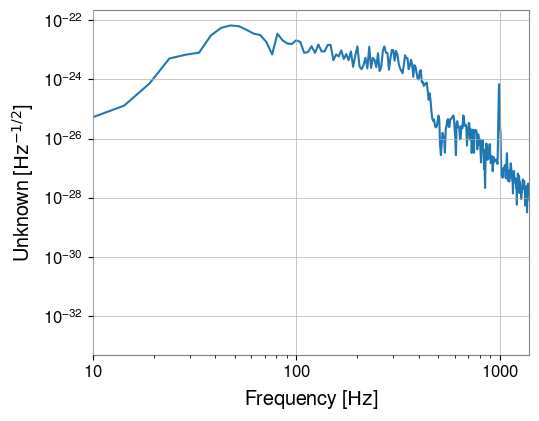

In [497]:
asd = data.asd()
plot = asd.plot()
ax = plot.gca()
ax.set_xlim(10, 1400)
plot.show(warn=False)

In [2]:
gps = event_gps('GW150914')

hdata = TimeSeries.fetch_open_data('H1', int(gps)-512, int(gps)+512, cache=True, verbose=True)
hdata = hdata.resample(8192)

Fetched 1 URLs from gwosc.org for [1126258950 .. 1126259974))
Reading data... [Done]


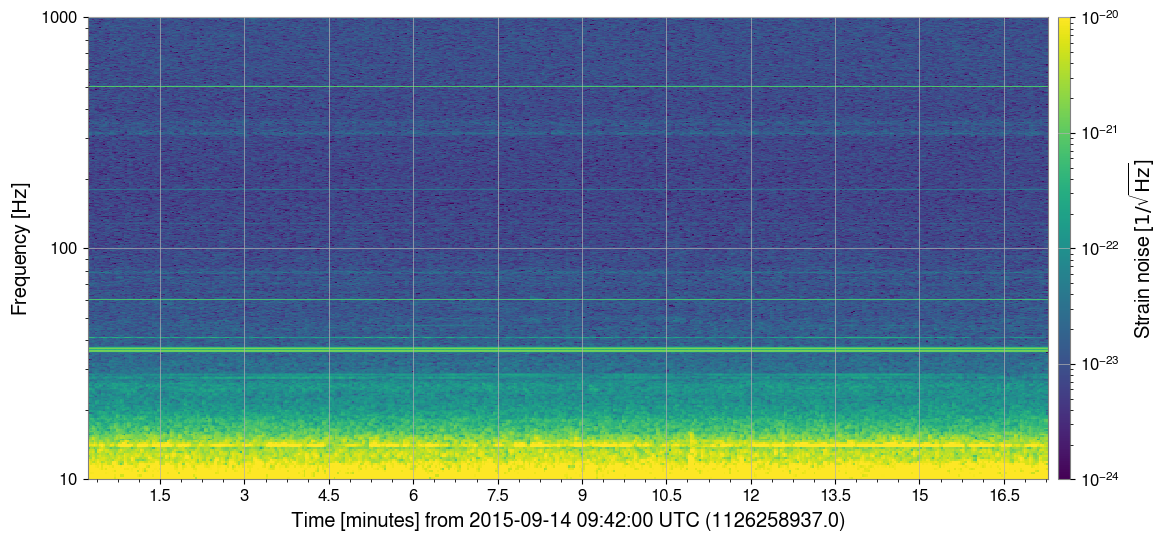

In [4]:
specgram = hdata.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1e3)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)

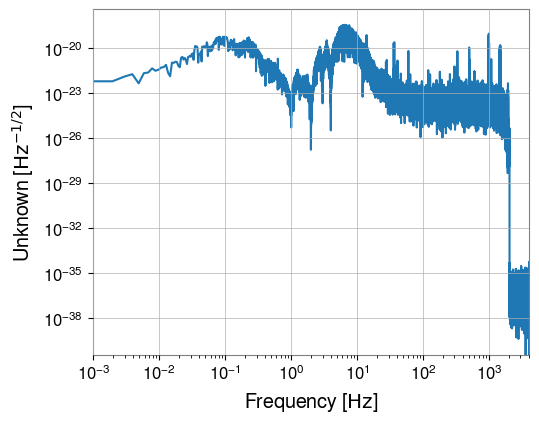

In [32]:
asd = hdata.psd()**(1/2)
plot = asd.plot()
ax = plot.gca()
plot.show(warn=False)

# Gaussian noise

4194305

In [46]:
math.sqrt(len(hdata))

2896.309375740099

In [47]:
rand_amplitude = asd.value / 30
rand_phase = np.random.uniform(-math.pi, math.pi)
freqs = rand_amplitude*np.exp(-1j * rand_phase)

f_series = FrequencySeries(freqs, frequencies=asd.frequencies)

noise = f_series.ifft()

In [45]:
np.mean(noise_asd)/np.mean(asd)

<Quantity 0.01735004>

In [42]:
1/0.0029106178

343.56967101623576

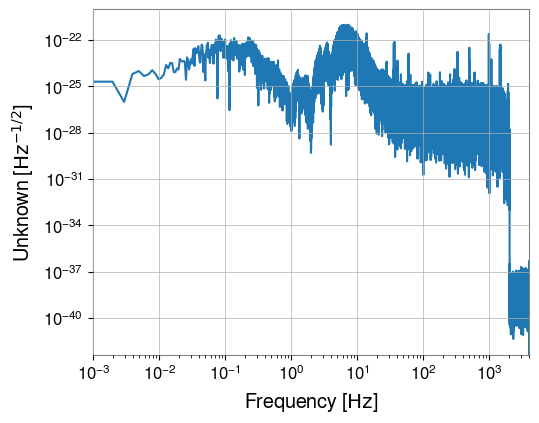

In [48]:
noise_asd = noise.psd()**(1/2)
plot = noise_asd.plot()
ax = plot.gca()
plot.show(warn=False)

In [75]:
from gwpy.frequencyseries import FrequencySeries

rand_freq = FrequencySeries(asd, frequencies=asd.frequencies)

rand_amplitude = asd.value
rand_phase = np.random.uniform(-math.pi, math.pi)
freqs = rand_amplitude*np.exp(-1j * rand_phase)
conj_freqs = np.conjugate(freqs[:0:-1])
all_freqs = np.concatenate([conj_freqs, freqs])
f_series = FrequencySeries(all_freqs, frequencies=np.concatenate([(-asd.frequencies.value[:0:-1]), asd.frequencies.value]))

noise = f_series.ifft()


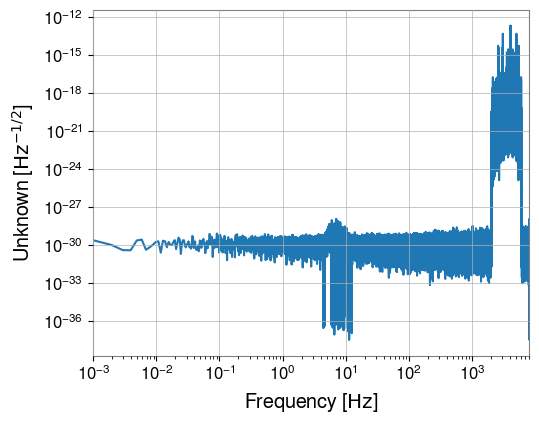

In [76]:
asd = noise.psd()**(1/2)
plot = asd.plot()
ax = plot.gca()
plot.show(warn=False)

/home/gui/miniconda3/envs/GW/lib/python3.12/site-packages/gwpy/plot/plot.py:287: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  super().show(warn=warn)


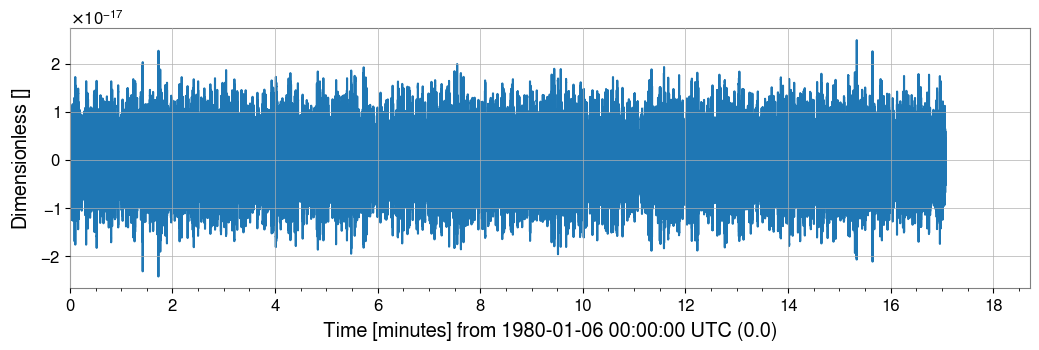

In [17]:
plot = noise.plot()
ax = plot.gca()
plot.show()

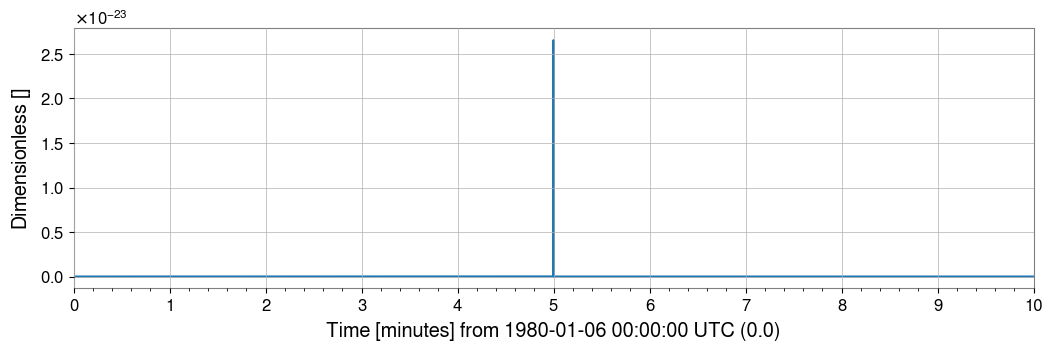

In [11]:
dt0 = noise.t0.value
dt1 = noise.times[-1].value
dt = noise.dt.value

t = np.arange(dt0, dt1+dt, step=dt)
h0 = np.random.uniform(2e-23, 1.5e-22)
tau = np.random.uniform(4e-4,4e-3)
t0 = 5*60
glitch = h0 * np.exp(-(t-t0)**2 / (2 * tau ** 2))

glitch = TimeSeries(glitch, times=noise.times, sample_rate=8192)
plot = glitch.plot()
ax = plot.gca()
ax.set_xlim([0, 10*60])
plot.show()

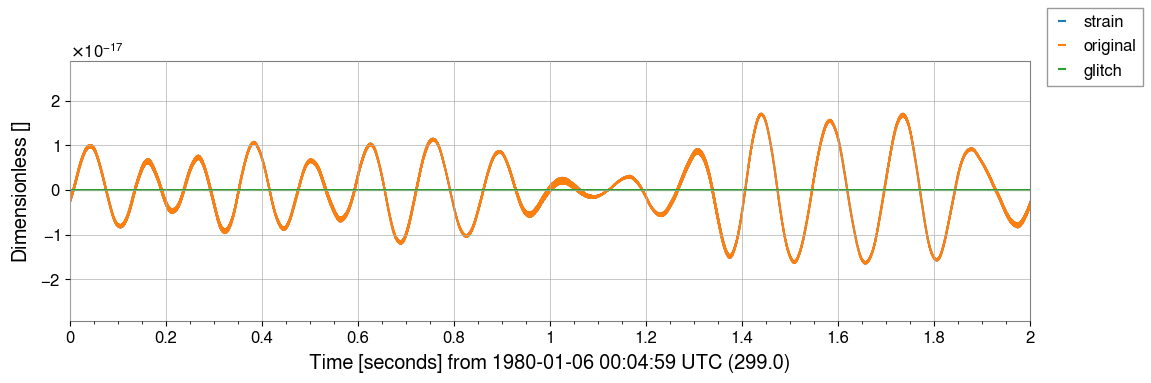

In [12]:
sint = noise+glitch
plot = sint.plot(label="strain")
ax = plot.gca()
ax.plot(noise, label="original")
ax.plot(glitch, label="glitch")
ax.set_xlim(t0-1,t0+1)
plot.legend()
plot.show()

/home/gui/miniconda3/envs/GW/lib/python3.12/site-packages/gwpy/plot/plot.py:287: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  super().show(warn=warn)


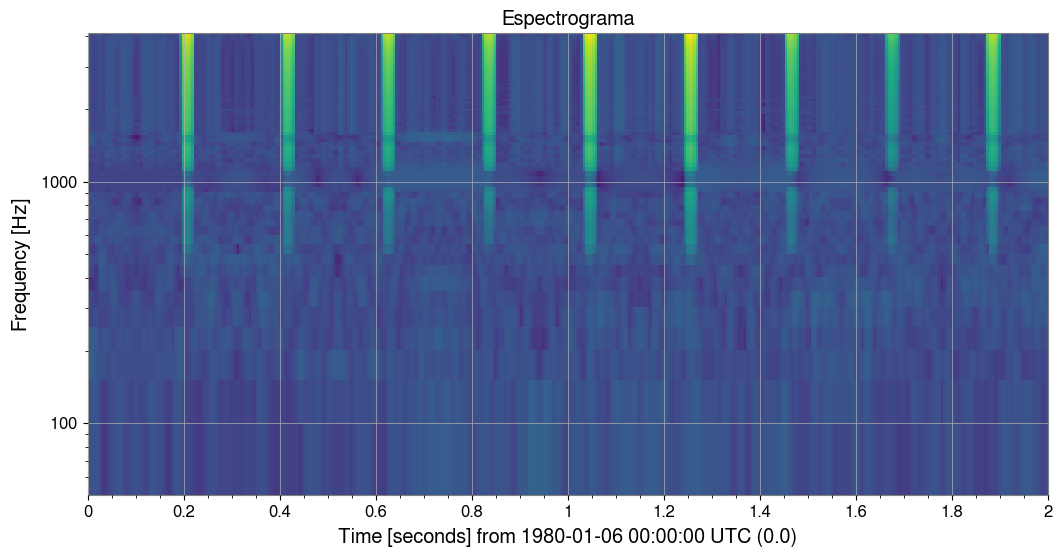

In [535]:
specgram = sint.spectrogram2(fftlength=0.02, overlap=0.015) ** (1/2.)

specgram = specgram.ratio('median')

plot = specgram.plot(norm='log', cmap='viridis', yscale='log')
ax = plot.gca()
ax.set_title('Espectrograma')
ax.set_xlim(0,2)

plot.show()

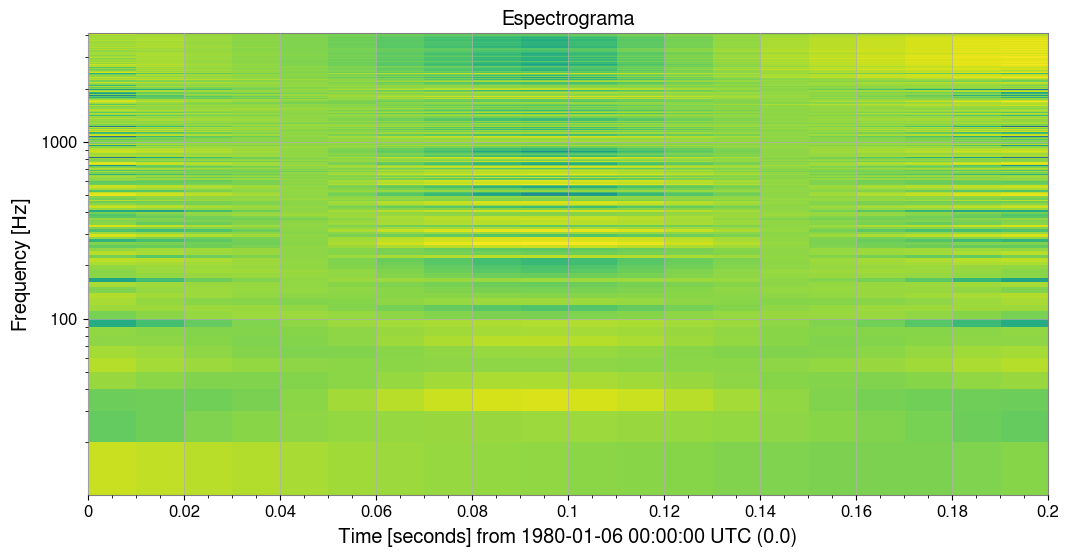

In [393]:
specgram = noise.spectrogram2(fftlength=0.1, overlap=0.1*0.9) ** (1/2.)

specgram = specgram.ratio('median')

plot = specgram.plot(norm='log', cmap='viridis', yscale='log')
ax = plot.gca()
ax.set_title('Espectrograma')
ax.set_xlim(0, 0.2)

plot.show()

/home/gui/miniconda3/envs/GW/lib/python3.12/site-packages/gwpy/plot/plot.py:287: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  super().show(warn=warn)


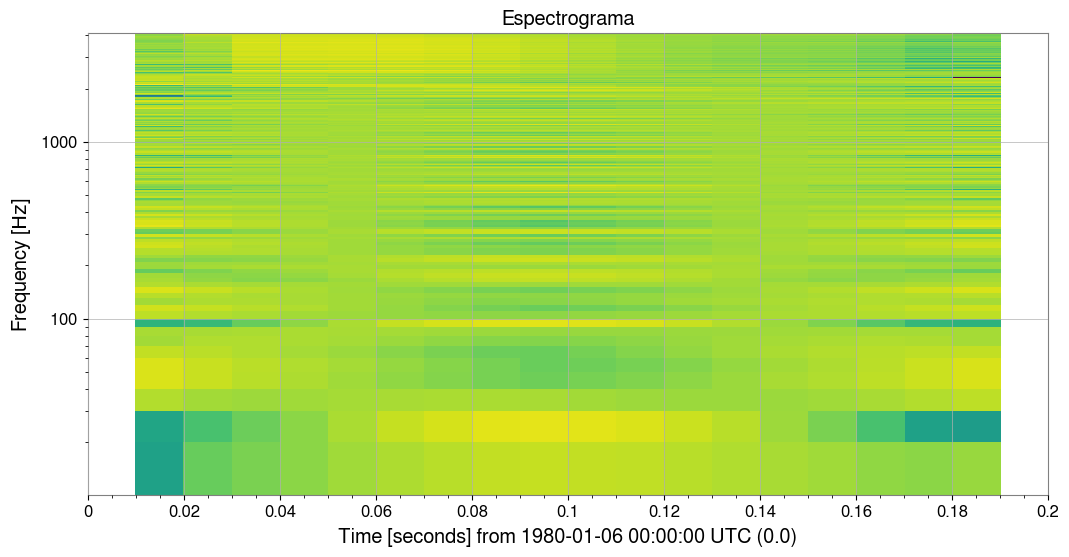

In [394]:
specgram = sint.spectrogram2(fftlength=0.1, overlap=0.1*0.9) ** (1/2.)

specgram = specgram.ratio('median')

plot = specgram.plot(norm='log', cmap='viridis', yscale='log')
ax = plot.gca()
ax.set_title('Espectrograma')
ax.set_xlim(0, 0.2)

plot.show()